## NOTEBOOK IMPORTS

In [104]:
# Data Analysis
import numpy as np
import pandas as pd
from pandas import DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Statistical Model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## GATHER DATA

In [105]:
data = pd.read_csv('cancer_reg.csv')

## DATA CLEANING AND ANALYSIS

In [106]:
data.isnull().any()

avgAnnCount                False
avgDeathsPerYear           False
TARGET_deathRate           False
incidenceRate              False
medIncome                  False
popEst2015                 False
povertyPercent             False
MedianAge                  False
MedianAgeMale              False
MedianAgeFemale            False
AvgHouseholdSize           False
PercentMarried             False
PctNoHS18_24               False
PctHS18_24                 False
PctHS25_Over               False
PctBachDeg25_Over          False
PctEmployed16_Over         False
PctUnemployed16_Over       False
PctPrivateCoverage         False
PctPrivateCoverageAlone    False
PctEmpPrivCoverage         False
PctPublicCoverage          False
PctPublicCoverageAlone     False
PctWhite                   False
PctBlack                   False
PctOtherRace               False
PctMarriedHouseholds       False
BirthRate                  False
dtype: bool

In [107]:
(data == 0).values.any()

False

In [108]:
data.PctEmployed16_Over.mean()

53.70984574991788

In [109]:
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctOtherRace,PctMarriedHouseholds,BirthRate
0,49.0,22,206.5,462.1,37794,7410,21.9,43.3,37.0,59.6,...,68.2,35.8,29.6,56.2,18.9,66.033505,27.318296,2.770083,49.848024,1.652893
1,27.0,14,179.9,340.7,30264,7903,38.9,38.4,36.1,46.2,...,43.4,34.7,32.5,44.5,31.7,58.107089,41.654098,1.983523,47.614314,5.070994
2,1067.0,358,142.9,444.5,51907,118891,10.9,65.3,64.7,65.7,...,66.6,50.0,18.8,65.1,21.8,88.341121,8.341859,0.957595,61.945503,6.766414
3,71.0,36,270.4,529.6,27484,12307,40.6,38.1,35.6,41.8,...,39.2,28.3,26.6,56.5,39.7,94.347241,4.726467,0.316681,52.685185,4.367470
4,24.0,9,220.6,510.8,45933,11368,18.8,23.3,23.0,24.5,...,80.6,40.0,17.4,16.1,7.4,69.926137,15.796542,2.853785,67.256637,11.720143


## DATA VISUALIZATION

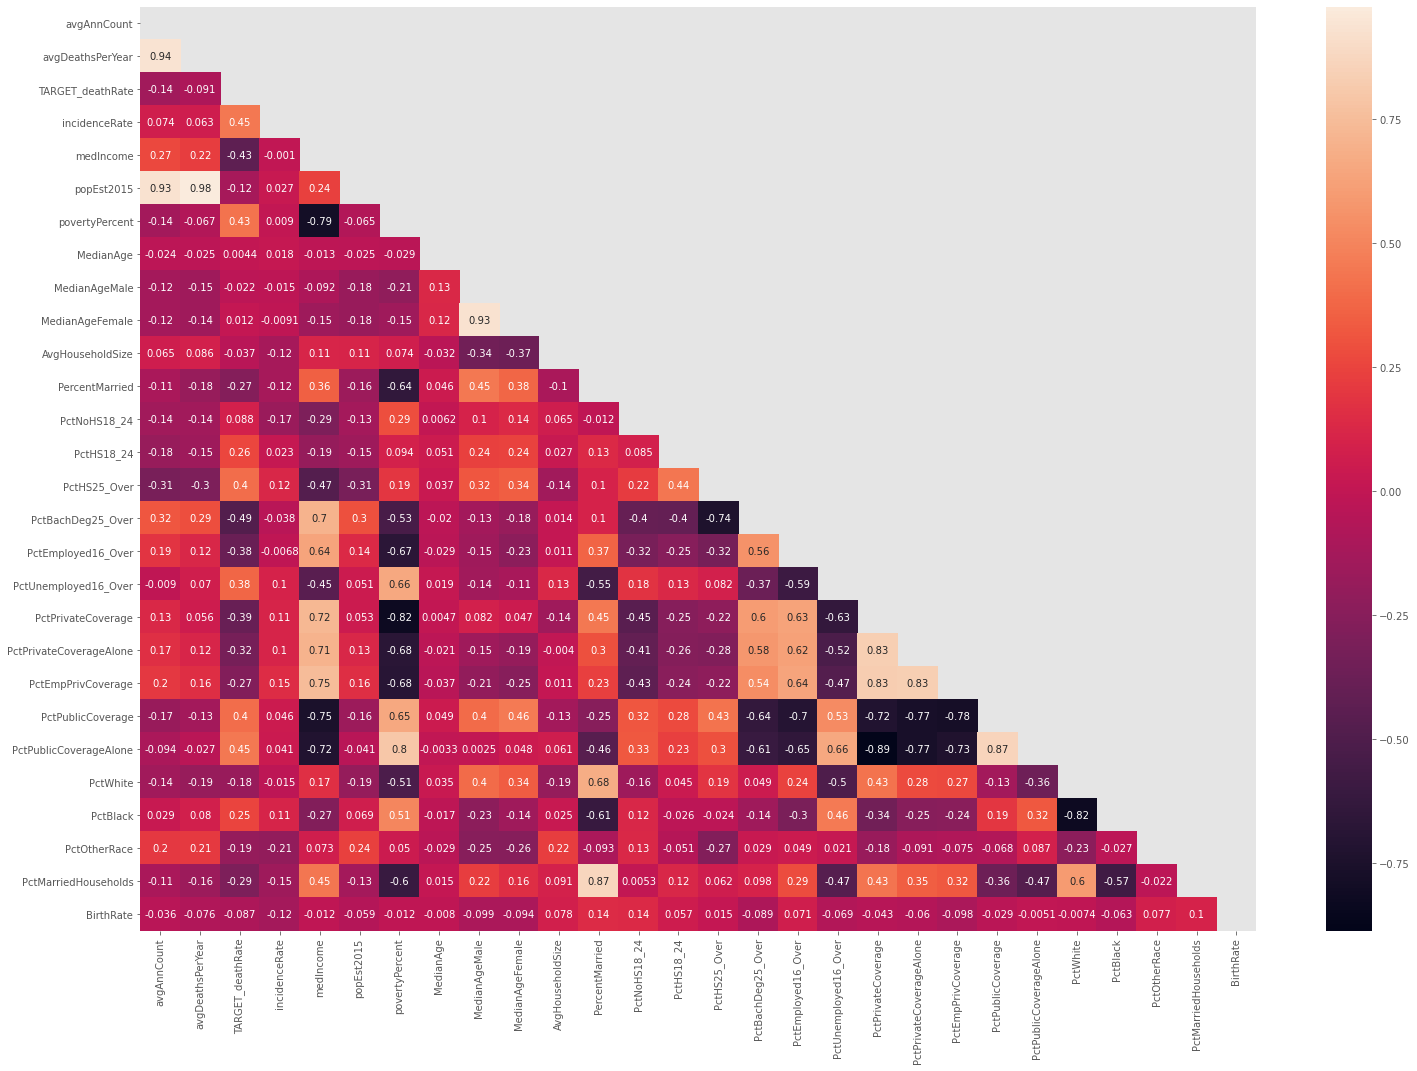

In [110]:
mask = np.zeros_like(data.corr())
mask_tri = np.triu_indices_from(mask)
mask[mask_tri] = True

plt.figure(figsize=[25, 17])
sns.heatmap(data.corr(), annot=True, mask=mask)
plt.show()

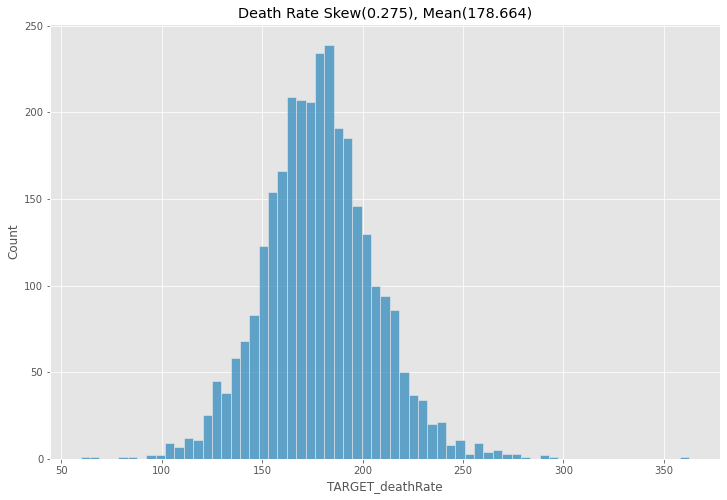

In [111]:
# Distribution of TARGET_deathRate Variable
plt.figure(figsize=[12, 8])
plt.style.use('ggplot')
sns.histplot(data, x=data.TARGET_deathRate)
plt.title(f'Death Rate Skew({round(data.TARGET_deathRate.skew(), 3)}), Mean({round(data.TARGET_deathRate.mean(), 3)})')
plt.show()

## SPLITTING INTO TRAINING AND TESTING SET

In [112]:
target = data.TARGET_deathRate
features = data.drop('TARGET_deathRate', axis=1)

X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.2, random_state=10)

In [113]:
# Running Linear Regression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [114]:
print('R-squared of Training set:', regr.score(X_train, y_train))
print('R-squared of Testing set:', regr.score(X_test, y_test))
print('Intercept', regr.intercept_)
DataFrame(regr.coef_, index=features.columns, columns=['coef'])

R-squared of Training set: 0.5161366957291358
R-squared of Testing set: 0.5346772017165158
Intercept 141.07953217346355


,coef
avgAnnCount,-0.003631
avgDeathsPerYear,0.017695
incidenceRate,0.190828
medIncome,0.000100
popEst2015,-0.000013
povertyPercent,0.455077
MedianAge,0.003088
MedianAgeMale,-0.635426
MedianAgeFemale,0.085205
AvgHouseholdSize,1.114287


## P-VALUES OF EVALUATING COEFFIENCTS

In [115]:
# ORIGINAL MODEL
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

In [116]:
orig_model = DataFrame(data={'coef':results.params, 'P-values':np.around(results.pvalues, 3)})

In [117]:
orig_model

,coef,P-values
const,141.079532,0.000
avgAnnCount,-0.003631,0.000
avgDeathsPerYear,0.017695,0.000
incidenceRate,0.190828,0.000
medIncome,0.000100,0.247
popEst2015,-0.000013,0.027
povertyPercent,0.455077,0.009
MedianAge,0.003088,0.730
MedianAgeMale,-0.635426,0.007
MedianAgeFemale,0.085205,0.728


## TESTING FOR MULTICOLLINEARITY

In [118]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

11.525557663935713

In [119]:
vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=x) for x in range(x_incl_const.shape[1])]
pd.DataFrame({'VIF':vif}, index=x_incl_const.columns)

,VIF
const,1679.947241
avgAnnCount,11.525558
avgDeathsPerYear,34.246679
incidenceRate,1.243245
medIncome,7.052864
popEst2015,27.841641
povertyPercent,8.251410
MedianAge,1.024693
MedianAgeMale,9.944520
MedianAgeFemale,11.037575


In [121]:
# NEW MODEL REMOVING INSIGNIFICANT FEATURES
insig_features = ['medIncome', 'popEst2015', 'MedianAge', 'PctBlack', 'PctPublicCoverageAlone', 'MedianAgeFemale', 
                  'PctPublicCoverage', 'AvgHouseholdSize', 'PctPrivateCoverageAlone']

x_incl_const = x_incl_const.drop(insig_features, axis=1)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()
new_model = DataFrame(data={'coef':results.params, 'P-values':np.around(results.pvalues, 3)})

In [122]:
new_model

,coef,P-values
const,148.114106,0.000
avgAnnCount,-0.003804,0.000
avgDeathsPerYear,0.009697,0.000
incidenceRate,0.192410,0.000
povertyPercent,0.303773,0.043
MedianAgeMale,-0.535552,0.000
PercentMarried,1.046185,0.000
PctNoHS18_24,-0.154147,0.011
PctHS18_24,0.252181,0.000
PctHS25_Over,0.413246,0.000


In [123]:
vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=x) for x in range(x_incl_const.shape[1])]
pd.DataFrame({'VIF':vif}, index=x_incl_const.columns)

,VIF
const,1238.586372
avgAnnCount,11.246688
avgDeathsPerYear,11.426143
incidenceRate,1.196111
povertyPercent,6.065380
MedianAgeMale,2.563872
PercentMarried,9.234379
PctNoHS18_24,1.518252
PctHS18_24,1.475417
PctHS25_Over,3.493901


In [126]:
new_data = data.drop(insig_features, axis=1)

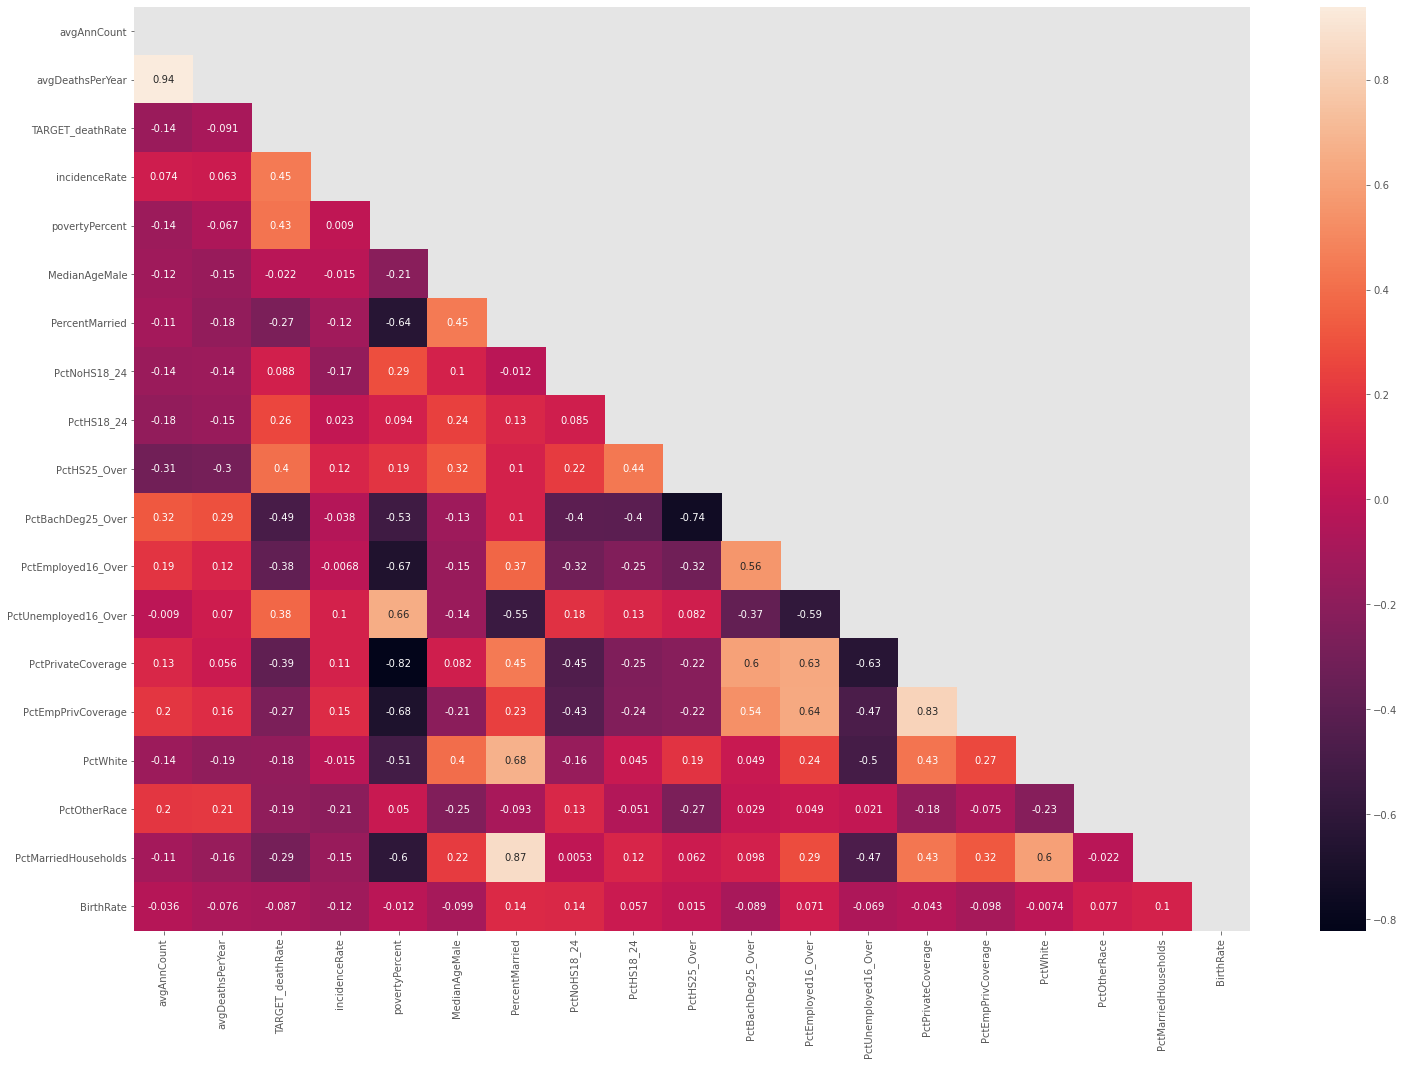

In [128]:
mask = np.zeros_like(new_data.corr())
mask_tri = np.triu_indices_from(mask)
mask[mask_tri] = True

plt.figure(figsize=[25, 17])
sns.heatmap(new_data.corr(), annot=True, mask=mask)
plt.show()